In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_openml
import numpy as np
from Plotter import Plotter

from FFNN import FFNN

In [2]:
def preprocess_mnist(num_samples=20000):
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    X = mnist.data
    y = mnist.target.astype(np.int32)
    
    np.random.seed(42)
    indices = np.random.choice(len(X), num_samples, replace=False)
    X = X[indices]
    y = y[indices]
    
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    
    y_one_hot = np.zeros((len(y), 10))
    y_one_hot[np.arange(len(y)), y] = 1
    
    X_train, X_temp, y_train, y_temp = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [3]:
X_train, X_val, X_test, y_train, y_val, y_test = preprocess_mnist(num_samples=10000)

ffnn = FFNN(
    input_size=784,
    hidden_sizes=[256, 128],
    output_size=10,
    learning_rate=0.001,
    hidden_activations=['relu', 'relu'],
    output_activation='softmax',
    loss_function='cce',
    reg_type='l2',
    reg_lambda=0.001,
    rms_norm=True,
    init_type='he'
)
ffnn.train(X_train, y_train, X_val, y_val, epochs=30, batch_size=32, verbose=1)

correct = 0
for inputs, target in zip(X_test, y_test):
    prediction = ffnn.predict(inputs)
    predicted_class = np.argmax(prediction)
    actual_class = np.argmax(target)
    if predicted_class == actual_class:
        correct += 1

print(f"Akurasi: {correct / len(y_test) * 100:.2f}%")

Epoch 1/30: 100%|█████████████████████████████████████| 219/219 [00:03<00:00, 64.49it/s, loss=0.254]


Train Loss: 0.2545 - Val Loss: 0.1522


Epoch 2/30: 100%|██████████████████████████████████████| 219/219 [00:03<00:00, 63.69it/s, loss=0.11]


Train Loss: 0.1096 - Val Loss: 0.0995


Epoch 3/30: 100%|████████████████████████████████████| 219/219 [00:03<00:00, 64.19it/s, loss=0.0787]


Train Loss: 0.0787 - Val Loss: 0.0825


Epoch 4/30: 100%|████████████████████████████████████| 219/219 [00:03<00:00, 68.42it/s, loss=0.0677]


Train Loss: 0.0677 - Val Loss: 0.0757


Epoch 5/30: 100%|█████████████████████████████████████| 219/219 [00:03<00:00, 63.46it/s, loss=0.063]


Train Loss: 0.0630 - Val Loss: 0.0723


Epoch 6/30: 100%|████████████████████████████████████| 219/219 [00:03<00:00, 61.98it/s, loss=0.0607]


Train Loss: 0.0607 - Val Loss: 0.0700


Epoch 7/30: 100%|████████████████████████████████████| 219/219 [00:03<00:00, 64.26it/s, loss=0.0593]


Train Loss: 0.0593 - Val Loss: 0.0691


Epoch 8/30: 100%|████████████████████████████████████| 219/219 [00:03<00:00, 65.40it/s, loss=0.0584]


Train Loss: 0.0584 - Val Loss: 0.0675


Epoch 9/30: 100%|████████████████████████████████████| 219/219 [00:03<00:00, 62.21it/s, loss=0.0577]


Train Loss: 0.0577 - Val Loss: 0.0666


Epoch 10/30: 100%|███████████████████████████████████| 219/219 [00:03<00:00, 59.48it/s, loss=0.0571]


Train Loss: 0.0571 - Val Loss: 0.0659


Epoch 11/30: 100%|███████████████████████████████████| 219/219 [00:03<00:00, 59.17it/s, loss=0.0567]


Train Loss: 0.0567 - Val Loss: 0.0652


Epoch 12/30: 100%|███████████████████████████████████| 219/219 [00:03<00:00, 62.08it/s, loss=0.0563]


Train Loss: 0.0563 - Val Loss: 0.0648


Epoch 13/30: 100%|████████████████████████████████████| 219/219 [00:03<00:00, 65.03it/s, loss=0.056]


Train Loss: 0.0560 - Val Loss: 0.0642


Epoch 14/30: 100%|███████████████████████████████████| 219/219 [00:03<00:00, 63.85it/s, loss=0.0558]


Train Loss: 0.0558 - Val Loss: 0.0641


Epoch 15/30: 100%|███████████████████████████████████| 219/219 [00:03<00:00, 67.86it/s, loss=0.0555]


Train Loss: 0.0555 - Val Loss: 0.0639


Epoch 16/30: 100%|███████████████████████████████████| 219/219 [00:03<00:00, 63.16it/s, loss=0.0553]


Train Loss: 0.0553 - Val Loss: 0.0633


Epoch 17/30: 100%|███████████████████████████████████| 219/219 [00:03<00:00, 63.17it/s, loss=0.0551]


Train Loss: 0.0551 - Val Loss: 0.0631


Epoch 18/30: 100%|███████████████████████████████████| 219/219 [00:03<00:00, 67.10it/s, loss=0.0549]


Train Loss: 0.0549 - Val Loss: 0.0626


Epoch 19/30: 100%|███████████████████████████████████| 219/219 [00:03<00:00, 59.64it/s, loss=0.0547]


Train Loss: 0.0547 - Val Loss: 0.0629


Epoch 20/30: 100%|███████████████████████████████████| 219/219 [00:03<00:00, 62.45it/s, loss=0.0545]


Train Loss: 0.0545 - Val Loss: 0.0625


Epoch 21/30: 100%|███████████████████████████████████| 219/219 [00:03<00:00, 61.03it/s, loss=0.0543]


Train Loss: 0.0543 - Val Loss: 0.0623


Epoch 22/30: 100%|███████████████████████████████████| 219/219 [00:03<00:00, 58.17it/s, loss=0.0542]


Train Loss: 0.0542 - Val Loss: 0.0621


Epoch 23/30: 100%|████████████████████████████████████| 219/219 [00:03<00:00, 56.85it/s, loss=0.054]


Train Loss: 0.0540 - Val Loss: 0.0620


Epoch 24/30: 100%|███████████████████████████████████| 219/219 [00:03<00:00, 59.34it/s, loss=0.0539]


Train Loss: 0.0539 - Val Loss: 0.0619


Epoch 25/30: 100%|███████████████████████████████████| 219/219 [00:03<00:00, 56.07it/s, loss=0.0538]


Train Loss: 0.0538 - Val Loss: 0.0617


Epoch 26/30: 100%|███████████████████████████████████| 219/219 [00:03<00:00, 59.96it/s, loss=0.0536]


Train Loss: 0.0536 - Val Loss: 0.0614


Epoch 27/30: 100%|███████████████████████████████████| 219/219 [00:03<00:00, 64.01it/s, loss=0.0535]


Train Loss: 0.0535 - Val Loss: 0.0612


Epoch 28/30: 100%|███████████████████████████████████| 219/219 [00:03<00:00, 59.78it/s, loss=0.0534]


Train Loss: 0.0534 - Val Loss: 0.0611


Epoch 29/30: 100%|███████████████████████████████████| 219/219 [00:03<00:00, 57.55it/s, loss=0.0533]


Train Loss: 0.0533 - Val Loss: 0.0608


Epoch 30/30: 100%|███████████████████████████████████| 219/219 [00:03<00:00, 66.86it/s, loss=0.0532]


Train Loss: 0.0532 - Val Loss: 0.0611
Akurasi: 91.67%


In [4]:
ffnn.compare_lib(X_train, y_train, X_test, y_test)

/home/qika/Code/Python Env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy FFNN: 91.67%
Accuracy MLP Sklearn: 93.40%


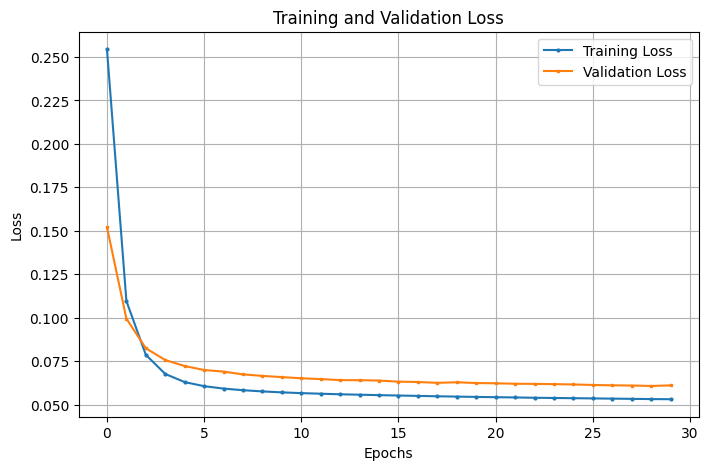

In [5]:
plotter = Plotter()
plotter.plot_training_history(ffnn)

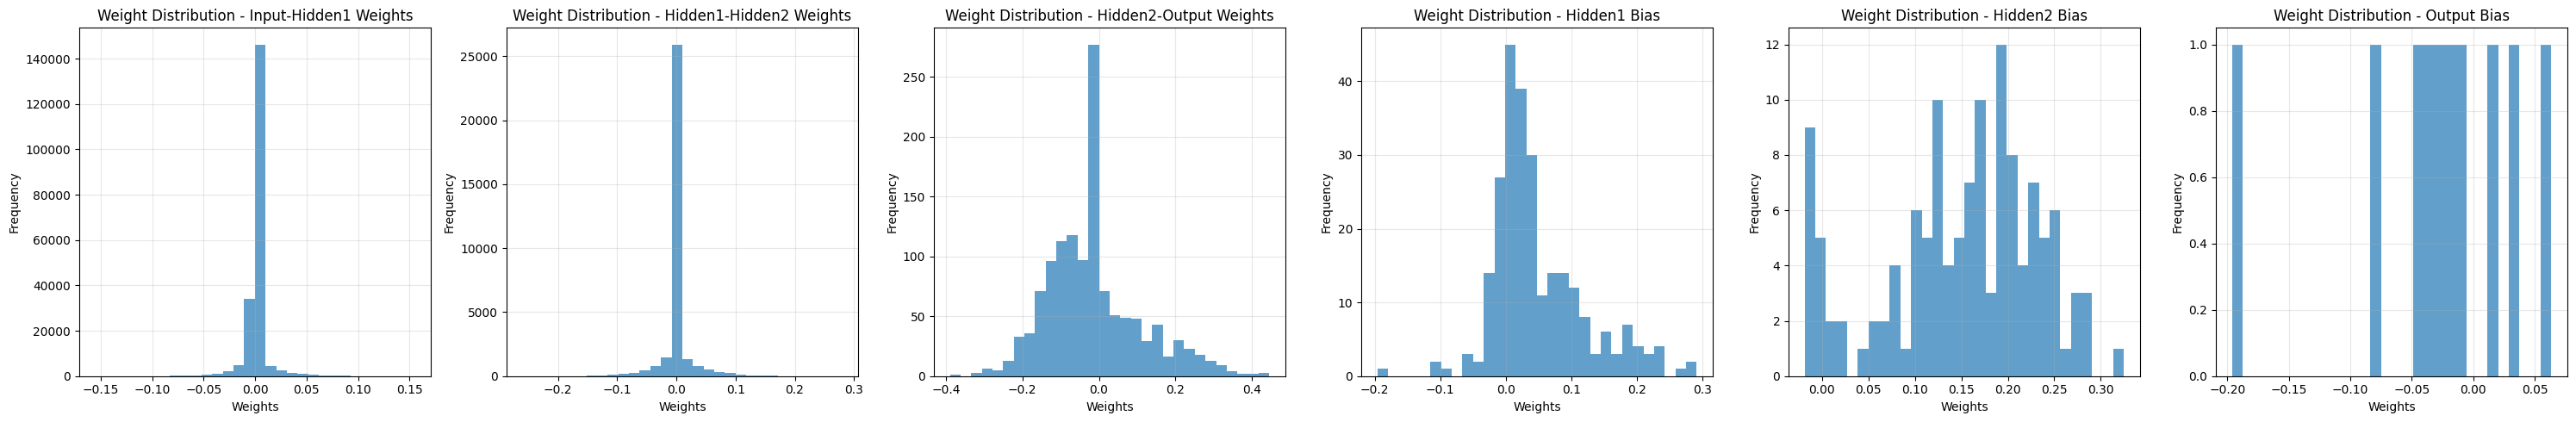

In [6]:
plotter.plot_weight_distributions(ffnn)

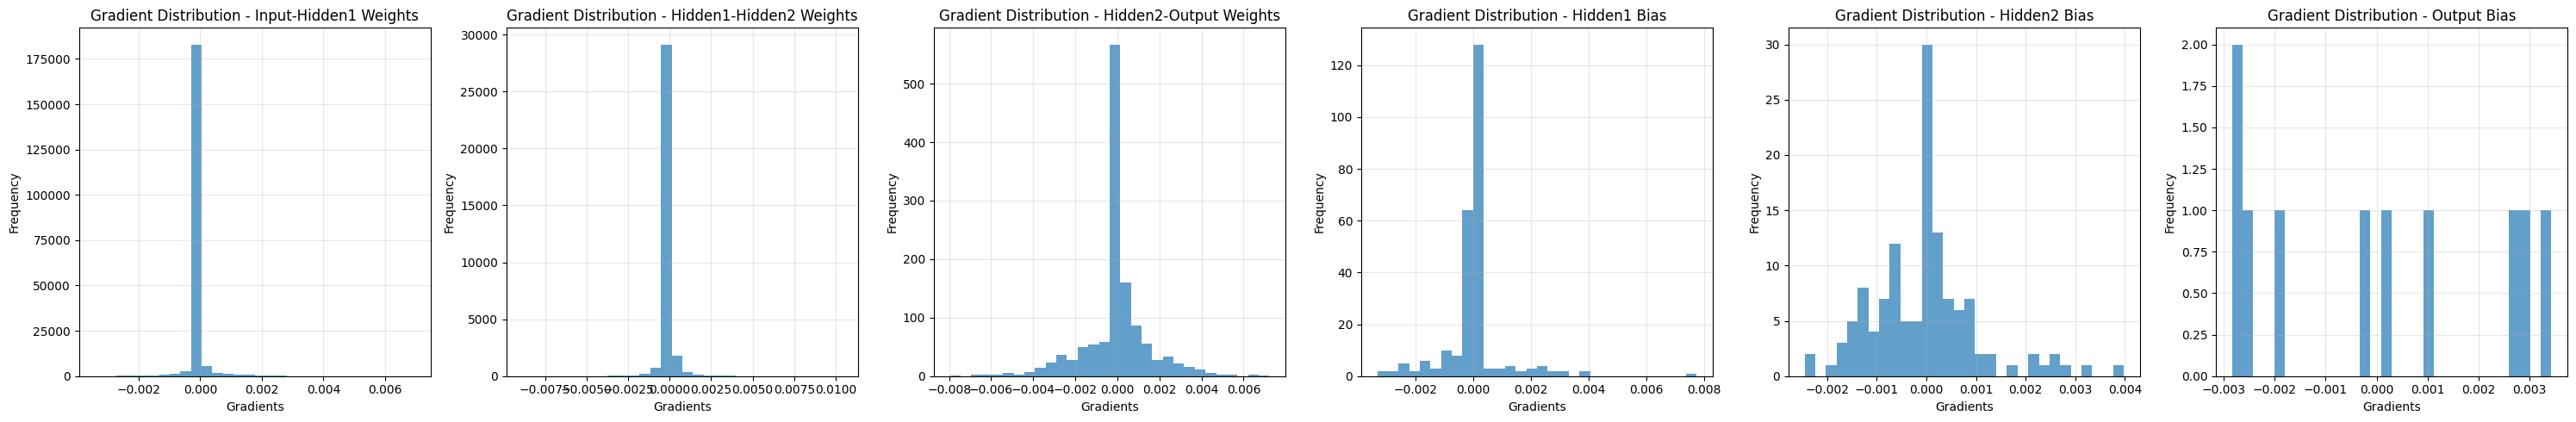

In [7]:
plotter.plot_gradient_distributions(ffnn)

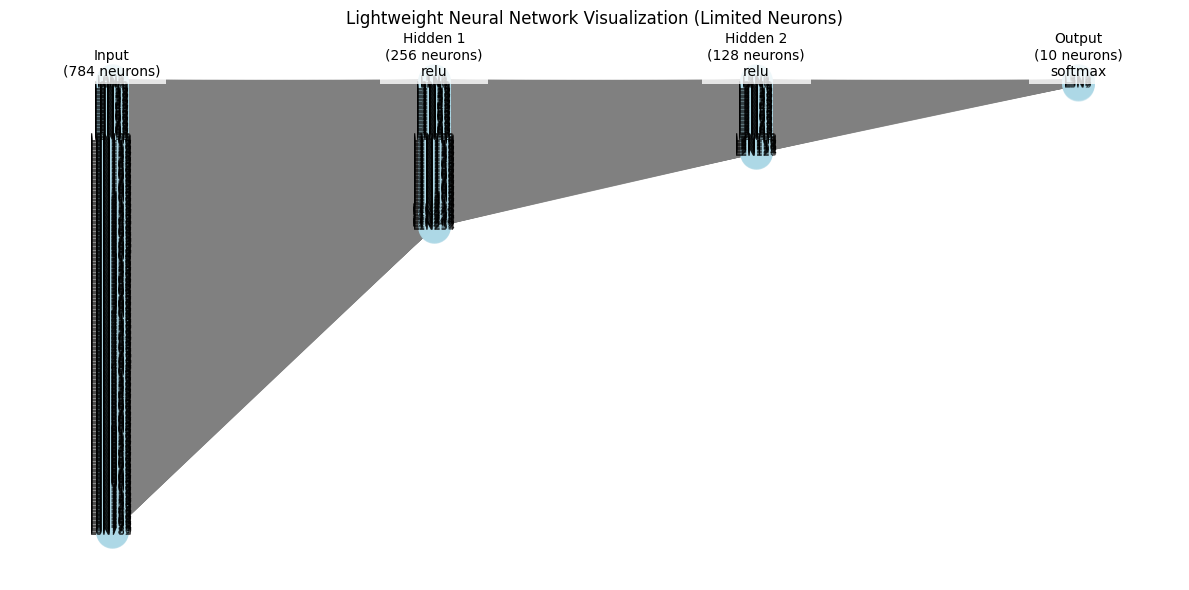

In [8]:
plotter.visualize_network_light(ffnn, 1000)

In [9]:
ffnn.save_model()

Model saved to /home/qika/Documents/Projects/Tubes1_ML_51/ffnn_model.npz
